# 1. Future Prediciton of Crime

In [15]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
from prophet import Prophet
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Load the dataset
data = pd.read_csv('data/crime2001_2012.csv')

In [5]:
data.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507


In [6]:
# Ensure 'YEAR' is in a proper date format
data['YEAR'] = pd.to_datetime(data['YEAR'].astype(str) + "-01-01")

In [7]:
# Get the current date
current_date = datetime.datetime.now()

In [8]:
# Extend the data to include at least the current date
latest_date = data['YEAR'].max()
if latest_date < current_date:
    current_row = pd.DataFrame({
        'STATE/UT': ["UNKNOWN"],  # Use an appropriate value for your context
        'YEAR': [current_date],
        'TOTAL IPC CRIMES': [0]  # Default value; adjust as needed
    })
    data = pd.concat([data, current_row], ignore_index=True)

In [9]:
# Group by year and sum total IPC crimes
crime_ts = data.groupby(['YEAR'])['TOTAL IPC CRIMES'].sum().reset_index()

In [10]:
# Rename columns for Prophet
crime_ts.rename(columns={'YEAR': 'ds', 'TOTAL IPC CRIMES': 'y'}, inplace=True)

In [11]:
# Create a Prophet model
model = Prophet()

# Fit the model
model.fit(crime_ts)

23:26:01 - cmdstanpy - INFO - Chain [1] start processing
23:26:01 - cmdstanpy - INFO - Chain [1] done processing


In [12]:
# Generate future dates for prediction
# We use the current date and add the desired number of future days
future_dates = pd.date_range(current_date, periods=7, freq='D')

# Convert to DataFrame with 'ds' column for Prophet
future_dates_df = pd.DataFrame({'ds': future_dates})

In [13]:
# Predict future values
forecast = model.predict(future_dates_df)

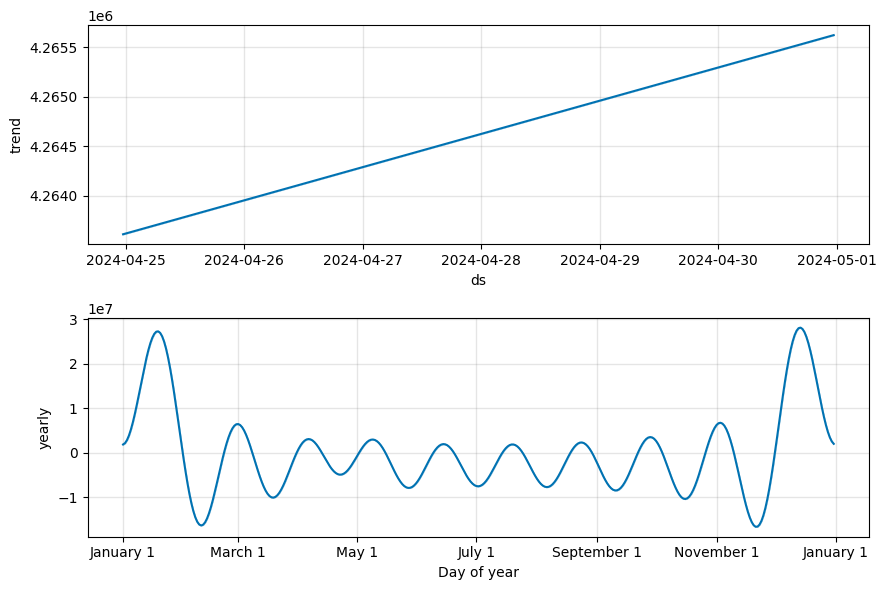

In [16]:
# Plot the forecast components (trend, weekly, yearly seasonality)
fig2 = model.plot_components(forecast)
plt.show()

# 2. Simple Regression to get crime rates for future

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Load your dataset (replace 'crime_data.csv' with your dataset)
data = pd.read_csv('data/crime2001_2012.csv')

# Ensure proper categorical encoding for STATE/UT and DISTRICT
for col in ['STATE/UT', 'DISTRICT']:
    if data[col].dtype != 'category':
        data[col] = data[col].astype('category')

# Convert the STATE/UT and DISTRICT to numeric codes
data['STATE/UT'] = data['STATE/UT'].cat.codes
data['DISTRICT'] = data['DISTRICT'].cat.codes

# Ensure 'YEAR' is an integer
data['YEAR'] = data['YEAR'].astype(int)

# Select the features and the crime types to predict
feature_columns = ['STATE/UT', 'DISTRICT', 'YEAR']
crime_types = ['MURDER', 'RAPE', 'THEFT', 'BURGLARY', 'ROBBERY', 'KIDNAPPING & ABDUCTION']

# Prepare the feature matrix and the target matrix
X = data[feature_columns]
y = data[crime_types]

# Check for missing values or invalid data
if X.isnull().any().any() or y.isnull().any().any():
    raise ValueError("Dataset contains missing or invalid data")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Collect user input for prediction
user_input = {
    'STATE/UT': input("Enter State/UT: "),
    'DISTRICT': input("Enter District: "),
    'YEAR': int(input("Enter Year: "))
}

# Convert the user input to a DataFrame
user_input_df = pd.DataFrame([user_input])

# Convert the categorical user input to numerical codes
user_input_df['STATE/UT'] = pd.Categorical(user_input_df['STATE/UT'], categories=data['STATE/UT'].cat.categories).codes
user_input_df['DISTRICT'] = pd.Categorical(user_input_df['DISTRICT'], categories=data['DISTRICT'].cat.categories).codes

# Predict the rates for various crime types
predicted_rates = model.predict(user_input_df)

# Display the predicted crime rates
for crime, rate in zip(crime_types, predicted_rates[0]):
    print(f"Predicted {crime} Rate:", rate)

# 3. Classification of crimes in various states and districts

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset (ensure the correct file path)
data = pd.read_csv('data/crime2001_2012.csv')

# Convert categorical columns to numerical codes
for col in ['STATE/UT', 'DISTRICT']:
    data[col] = data[col].astype('category').cat.codes

# Feature columns for classification
feature_columns = ['STATE/UT', 'DISTRICT', 'YEAR']

# Define a crime profile threshold (using total IPC crimes)
threshold = data['TOTAL IPC CRIMES'].median()  # Separate high-crime and low-crime
data['CRIME_PROFILE'] = (data['TOTAL IPC CRIMES'] > threshold).astype(int)  # 1 for high-crime, 0 for low-crime

# Prepare features and target for the model
X = data[feature_columns]
y = data['CRIME_PROFILE']

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Classification Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Get user input for classification
user_input = {
    'STATE/UT': input("Enter State/UT: "),
    'DISTRICT': input("Enter District: "),
    'YEAR': None  # Initialize to None to handle invalid input
}

# Ensure YEAR is a valid integer
while user_input['YEAR'] is None:
    try:
        user_input['YEAR'] = int(input("Enter Year (number): "))
    except ValueError:
        print("Invalid input for YEAR. Please enter a valid integer.")

# Convert the user input to DataFrame
user_input_df = pd.DataFrame([user_input])

# Convert user input columns to numerical codes for classification
try:
    user_input_df['STATE/UT'] = pd.Categorical(user_input_df['STATE/UT'], categories=data['STATE/UT'].cat.categories).codes
    user_input_df['DISTRICT'] = pd.Categorical(user_input_df['DISTRICT'], categories=data['DISTRICT'].cat.categories).codes
except Exception as e:
    print(f"Error in converting user input to categorical codes: {e}")
    raise

# Predict the crime profile for the given input
predicted_profile = model.predict(user_input_df)

# Output the classification result
classification_result = "High-Crime" if predicted_profile[0] == 1 else "Low-Crime"
print(f"The predicted crime profile for the given state/district is: {classification_result}")

Classification Accuracy: 0.7422394678492239
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.71      0.74       908
           1       0.73      0.77      0.75       896

    accuracy                           0.74      1804
   macro avg       0.74      0.74      0.74      1804
weighted avg       0.74      0.74      0.74      1804

Error in converting user input to categorical codes: Can only use .cat accessor with a 'category' dtype


AttributeError: Can only use .cat accessor with a 'category' dtype